In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

In [2]:
from utils import convert_dataset_to_coco
import glob
import os

In [3]:
# Convert datasets/BF-C2DL-HSC/01 to COCO format

dataset_name = "PhC-C2DL-PSC"

dataset_root = f"datasets/{dataset_name}"

# # Find all images in datasets/BF-C2DL-HSC/01
# image_paths = glob.glob(os.path.join(dataset_root, "01", "*.tif"))

# # Find all masks in datasets/BF-C2DL-HSC/01_ST/SEG
# mask_paths = glob.glob(os.path.join(dataset_root, "01_ST", "SEG", "*.tif"))

# # Create output directory
# output_dir = os.path.join(dataset_root, "annotations_01_pretrain")
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Convert dataset to COCO format
# convert_dataset_to_coco(image_paths, mask_paths, output_dir, f"coco_{dataset_name}_01")



In [4]:
# Convert datasets/BF-C2DL-HSC/01 to COCO format

dataset_root = f"datasets/{dataset_name}"

# Find all images in datasets/BF-C2DL-HSC/01
image_paths = glob.glob(os.path.join(dataset_root, "01", "*.tif"))

# Find all masks in datasets/BF-C2DL-HSC/01_ST/SEG
mask_paths = glob.glob(os.path.join(dataset_root, "01_ST", "SEG", "*.tif"))

# Create output directory
output_dir = os.path.join(dataset_root, "annotations_01_train")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Convert dataset to COCO format
convert_dataset_to_coco(image_paths[:1], mask_paths[:1], output_dir, f"coco_{dataset_name}_02_first", (slice(288, 360), slice(305, 535)))

100%|██████████| 1/1 [00:00<00:00, 27.03it/s]


In [6]:
# Convert datasets/BF-C2DL-HSC/01 to COCO format


# Find all images in datasets/BF-C2DL-HSC/01
image_paths = glob.glob(os.path.join(dataset_root, "01", "*.tif"))

# Find all masks in datasets/BF-C2DL-HSC/01_ST/SEG
mask_paths = glob.glob(os.path.join(dataset_root, "01_GT", "SEG", "*.tif"))

# filter image_paths so they only contain images that have a corresponding mask
image_paths = [image_path for image_path in image_paths if os.path.basename(image_path).split(".")[0][1:] in [os.path.basename(mask_path).split(".")[0][7:] for mask_path in mask_paths]]

# Create output directory
output_dir = os.path.join(dataset_root, "annotations_01_test")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# # Convert dataset to COCO format
convert_dataset_to_coco(image_paths, mask_paths, output_dir,  f"coco_{dataset_name}_01_test")

  0%|          | 0/2 [00:00<?, ?it/s]


ValueError: could not broadcast input array from shape (576,720) into shape (1010,1010)

In [35]:
image_paths

['datasets/BF-C2DL-HSC\\02\\t0046.tif',
 'datasets/BF-C2DL-HSC\\02\\t0056.tif',
 'datasets/BF-C2DL-HSC\\02\\t0287.tif',
 'datasets/BF-C2DL-HSC\\02\\t0448.tif',
 'datasets/BF-C2DL-HSC\\02\\t0799.tif',
 'datasets/BF-C2DL-HSC\\02\\t0879.tif',
 'datasets/BF-C2DL-HSC\\02\\t1585.tif',
 'datasets/BF-C2DL-HSC\\02\\t1748.tif']

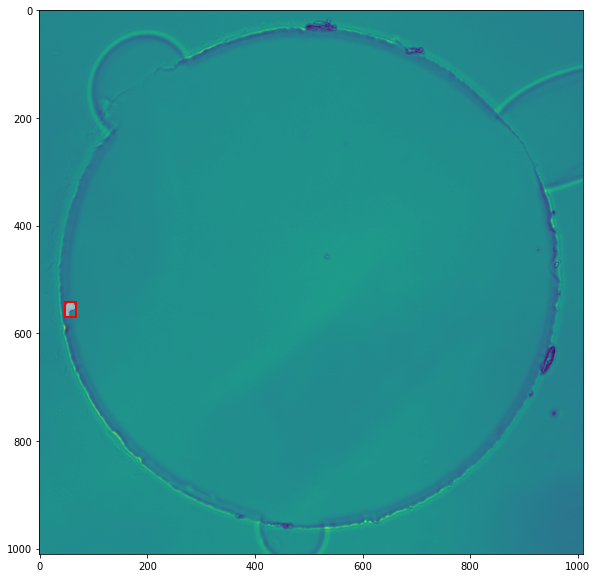

In [20]:
import json
import matplotlib.pyplot as plt
import pycocotools.mask as mask_util
import numpy as np
# Load the converted dataset to check the results
with open(os.path.join(output_dir, "coco_BF-C2DL-HSC_01_Gold.json")) as f:
    data = json.load(f)

    # Load the first image from data
    image = data["images"][0]
    image_id = image["id"]

    image = skimage.io.imread(os.path.join(dataset_root, "01", image["file_name"]))

    # Load annotations for the first image
    annotations = [a for a in data["annotations"] if a["image_id"] == image_id]

    plt.figure(figsize=(10, 10))
    # show the image
    plt.imshow(image)

    # show the annotations
    for annotation in annotations:
        y, x, h, w = annotation["bbox"]
        rect = plt.Rectangle((x, y), w-x, h-y, fill=False, edgecolor="red", linewidth=2)
        plt.gca().add_patch(rect)

    # Show the segmentation masks for the first image
    masks = [a["segmentation"] for a in annotations]
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    for mask_poly in masks:
        # Decode the segmentation mask
        rle = mask_poly
        mask_img = mask_util.decode(rle)

        # Add the mask to the full size mask array
        mask = np.maximum(mask, mask_img)
    
    plt.imshow(mask, alpha=mask * 0.5, cmap="gray")
    plt.show()

<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/jp/vit/examples/LodeSTAR/01. autotracker_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->